
<img src="Assessment Submission Form_all modules.png" alt="Assessment Submission">

**<h1 style=text-align:center;>Breast Cancer Prediction 📈</h1>**

## Problem Statement❓

<p>
The main aim of this pipeline is to create a predictive model for breast cancer diagnosis using the data from the chosen dataset. Here the focus is on how early and precise diagnosis can reducing mortality, and help the doctors in efficiently planning the treatment .The data collection process includes several patient's data, clinical test findings, past history, and treatment results. This pipeline needs to be created using data exploration, preprocessing, feature engineering, model selection, hyperparameter tuning, and model evaluation so that a dependable model that is integrated into the diagnostic workflow can be created offering a safe tool to diagnose breast cancer accurately.
</p>

For this dataset I will be using recall as my primary metrics to measure the performance of the model. As our focus will be on the malignant cases in this dataset. A good recall will show that we are capturing this accurately.

#### Dataset Link : https://www.kaggle.com/datasets/adhyanmaji31/breast-cancer-prediction/data
#### Github Repo : https://github.com/SherinHartman1098/M606_Machine-Learning-Project

## Importing Libraries 📚

In [100]:
import pandas as pd
import numpy as np
from datetime import datetime
import sklearn.model_selection
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from matplotlib.ticker import ScalarFormatter
import sklearn.compose
import sklearn.preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score,recall_score
import multiprocessing


## Importing the Dataset 💽

In [101]:
#Loading the dataset into the DataFrame

cancer_data = pd.read_csv('/Users/jasonjoelpinto/Downloads/Breast Cancer Prediction.csv')
cancer_data.drop(columns=['Sample code number'], inplace=True)
cancer_data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In the above process, the dataset of the breast cancer prediction has been been loaded to the dataframe called 'cancer_data'. The column 'sample code number'( which is treated as an ID to the rows) is dropped from the dataset as there is no significant impact of this particular column on our target label.

## Data Exploration (EDA) 🧭

<p>Note: For EDA and data pre-processing, the entire dataset will be taken into consideration. Once the dataset is cleaned,it will be split into training and testing data-sets in order to maintain consistency.</p>
 


In [102]:
cancer_data.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

<br/>
Now, lets check the shape of the dataset that is loaded to the DataFrame (cancer_data). Using cancer_data.shape, we can learn how may rows and columns does the given dataset contain.


In [103]:
print("The size of the Data-Frame is :",cancer_data.shape)
print(" Number of rows in the dataset is :",cancer_data.shape[0])
print(" Number of columns in the dataset is :",cancer_data.shape[1])

The size of the Data-Frame is : (683, 10)
 Number of rows in the dataset is : 683
 Number of columns in the dataset is : 10


Fro the above output, we learn that the size of the data frame(cancer_data) is (683,10) where 683 represents number of rows and 10 represents number of columns.

In [104]:
nullValue_Percentage = {}
for column in cancer_data:
    nullValue_Percentage[column] = (( cancer_data[column].isnull().sum() ))
np_cancer_data = pd.DataFrame( list( nullValue_Percentage.items() ),  columns=[  'column name'  , 'null value %' ])
np_cancer_data

,column name,null value %
0,Clump Thickness,0
1,Uniformity of Cell Size,0
2,Uniformity of Cell Shape,0
3,Marginal Adhesion,0
4,Single Epithelial Cell Size,0
5,Bare Nuclei,0
6,Bland Chromatin,0
7,Normal Nucleoli,0
8,Mitoses,0
9,Class,0


<p> From the above output, we learn that there are no null values present in the given dataset. Further we can check if there any duplicates in the given dataset.</p>

In [105]:
cancer_data.duplicated().any()

True

We see that there are duplicate values in the dataset. Hence, we can use drop_duplicates() function to remove all the duplicates in the given dataset.

In [106]:
cancer_data=cancer_data.drop_duplicates()

In [107]:
cancer_data.duplicated().any()

False

<p>Now we can see that all the duplicates are removed as the output for 'del_dupe.duplicated().any()' is false. This shows that the given dataset is clean and and has no duplicates.<p></br>

In [108]:
cancer_data.shape

(449, 10)

Now from cancer_data.shape, we learn that there are 449 rows, and 10 columns in our given dataset. Further, we can check the shape of the train_data and test_data. 

In [109]:
cancer_data_train, cancer_data_val_test=sklearn.model_selection.train_test_split(cancer_data,test_size=0.3, shuffle=True, stratify=cancer_data['Class'])
cancer_data_test, cancer_data_val=sklearn.model_selection.train_test_split(cancer_data_val_test,test_size=0.5, shuffle=True, stratify=cancer_data_val_test['Class'])

print("The size of the train data set is :", cancer_data_train.shape)
print("The size of the Validation data set is :",cancer_data_val.shape)
print("The size of the test data set is :",cancer_data_test.shape)

The size of the train data set is : (314, 10)
The size of the Validation data set is : (68, 10)
The size of the test data set is : (67, 10)


Here, the dataset is categorized into 3 sets. i.e; train set`cancer_data_train`, validation`cancer_data_val` set and test set `cancer_data_test`. The test size given to the train set is 70% and the rest 30% is stored in variable cancer_data_val_test. Now from the above output, we can see that the size of the train data set is (314,10), the size of the validation data set is (68,10) and the size of the test set is (67,10). To summarise, the dataset is divided into 7:1.5:1.5 ratio.

<p>Next, we are inspecting the data types of each column in the cancer_data_train DataFrame. This helps to analyse and understand  the structure and nature of  data, which is fundamental for different subsequent steps such as data cleaning, feature engineering, and modeling</p>

In [110]:
cancer_data_train.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

<p>The data types of all the columns are numerical. Therefore, there are no categorical features in the given dataset.</p>

<p>Now, lets create histograms for every columns in the breast cancer prediction (cancer_data) dataset to produce a visual overview of the distribution of data across different features.</p>

<Figure size 1000x800 with 0 Axes>

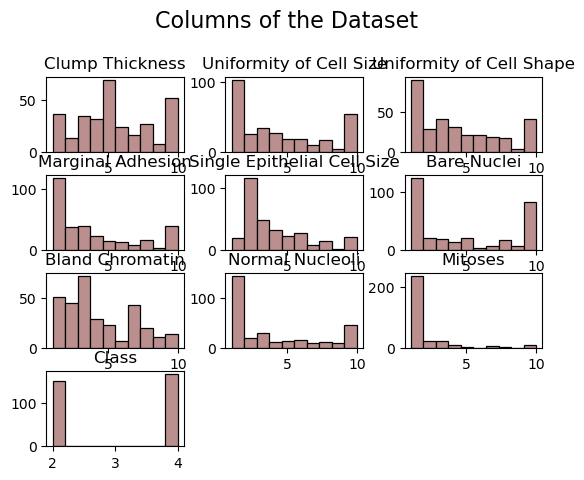

In [111]:
plt.figure(figsize=(10, 8)) 
plt.subplots_adjust(hspace=4.5, wspace=5.7)
cancer_data_train.hist(color='#BC8F8F', edgecolor='black', linewidth=0.9, grid=False) 
plt.suptitle('Columns of the Dataset', x=0.5, y=1.02, fontsize=16)
plt.show()

The above histogram represents multiple sub-graphgs that shows the clump thickness, uniformity of cell, uniformity of cell shape, Marginal Adhesion, Single epithelial cell, bare nuclei, bland chromatin, normal nucleoli, mitoses, and class.

<p>now, lets plot the histogram for our target label 'Class'.</p>

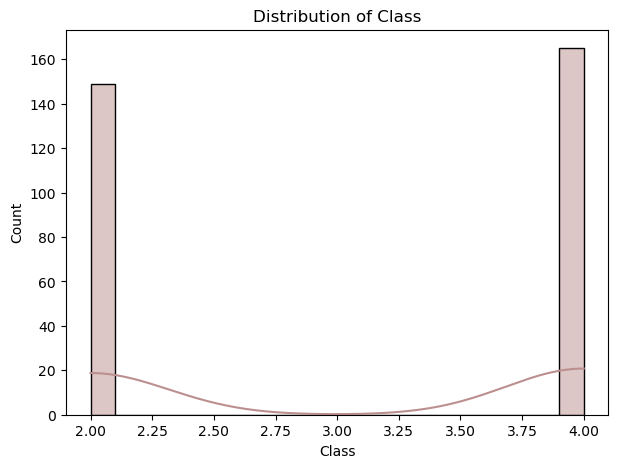

In [112]:
plt.figure(figsize=(7, 5))
sns.histplot(cancer_data_train['Class'], bins=20, kde=True, color='#BC8F8F')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The above histohraph repsresents how many count of each classes are present in out dataset. As shown there are only two classes( 2 and 4). As we already know class 2 represent the non-cancerous tumour and class 4 represents cancerous tumour.

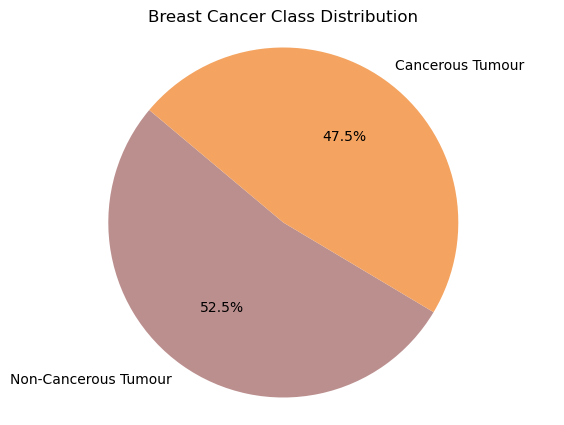

In [113]:
counts = cancer_data_train['Class'].value_counts()
labels = ['Non-Cancerous Tumour', 'Cancerous Tumour']
colors = ['#BC8F8F', '#F4A460']

plt.figure(figsize=(7, 5))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Breast Cancer Class Distribution')
plt.axis('equal')
plt.show()

<p>The above chart shows the ditribution of class of non-cancerous tumour(begnin)and cancerous tumour(Malignant). Where class 2(non-cancerous tumour) is 54.5% and class 4(Canceerous tumour) is 45.5%.</p>

<p>Now, lets plot a heatmap visualization of the correlation matrix for numerical features in the dataset cancer_data.</p>

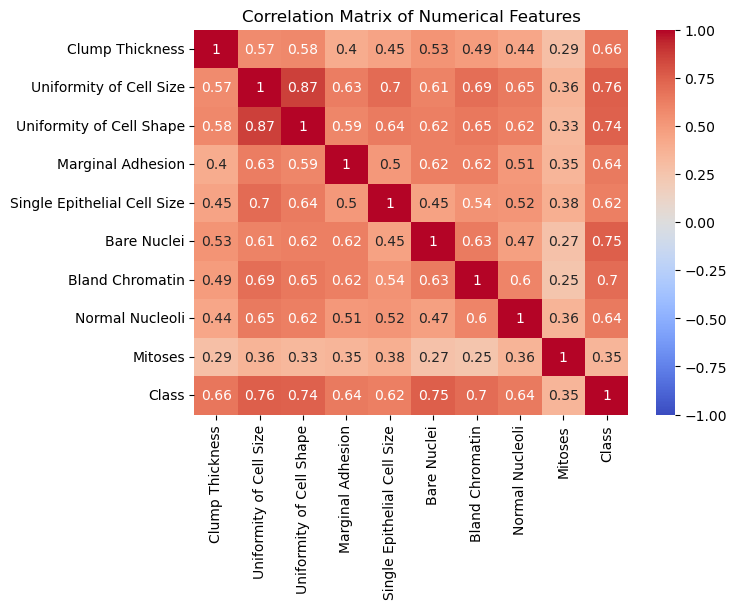

In [114]:
numerical_cancer_data = cancer_data_train.select_dtypes(include=['number'])
correlation_matrix = numerical_cancer_data.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


<p>The above heatmeap illustrates the correlation matrix of numerical features and the given dataset. Every cell represents the relationship from -1 to +1. The relationships are represented by 2 colors. The higher relationshps are denoted by hotter tones of red and lower relationships are denoted with cooler tones of blue. The main aim here is to depict the interdependencies between different numerical features which will inturn support the feature selection and model building.</p>

## Data-PreProcessing 🔩


In [115]:
x_train=cancer_data_train.drop(['Class'], axis=1)
y_train=cancer_data_train['Class']
x_test=cancer_data_test.drop(['Class'],axis=1)
y_test=cancer_data_test['Class']
x_val=cancer_data_val.drop(['Class'],axis=1)
y_val=cancer_data_val['Class']

print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of y_train :", y_train.shape)
print("Size of y_test :", y_test.shape)
print("Size of x_val :", x_val.shape)
print("Size of y_val :", y_val.shape)

Size of x_train : (314, 9)
Size of x_test : (67, 9)
Size of y_train : (314,)
Size of y_test : (67,)
Size of x_val : (68, 9)
Size of y_val : (68,)


Now, from the above output we see that there are 6 variables printed. This is because, initially the dataset was split into 3 halves, where it was categorized into train, test and validate sets. The size of the x_train is 314 rows with 9 columns, size of x_test is 67rows a=with 9 columns, size of y_train is 314 labels , size of y_test is 67 labels, size of x_val is 68rows with 9 columns and size of y_val is 68 labels.

In [116]:
y_test.head()

673    2
505    2
579    4
57     4
320    4
Name: Class, dtype: int64

In [117]:
type(y_train)

pandas.core.series.Series

In [118]:
type(x_train)

pandas.core.frame.DataFrame

<p>Next, for the given dataset,we consider the 'Class' column as a logical choice for plotting a histogram to analyze the distribution of class to check if the data is balanced or not. </p>

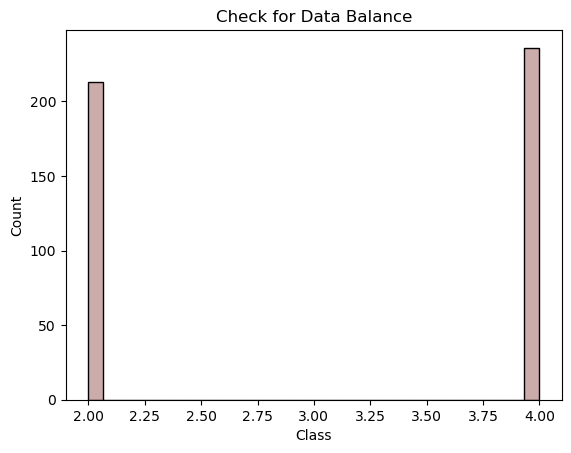

Balance Ratio: 0.90


In [119]:

class_distribution = cancer_data_train['Class'].value_counts()
class_distribution_cancer_data = pd.DataFrame({
    'Class': class_distribution.index,
    'Count': class_distribution.values
})
sns.histplot(data=cancer_data, x='Class', bins=30, color='#BC8F8F')
plt.title('Check for Data Balance')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
balance_ratio = class_distribution.min() / class_distribution.max()
print(f"Balance Ratio: {balance_ratio:.2f}")

<p>From the above graph, we learn that the balance ratio for the column 'Class' which is also our target label is 0.84. This means that the data is fairly balanced with the minority class having approximately 84% of the number of instances as the majority class. When we talk about balance ratio for the dataset, a ratio that is close to 1 is considered as the ideal balance ratio, indicating that the class is balanced. Since the train set is balanced, there was no need to oversample or undersample the dataset.</p>

checking the x_train columns to make sure it is intact before proceeding.

In [120]:
x_train.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

## Feature Engineering 👷🏻‍♀️

In [121]:
numerical_attributes_fet=x_train.select_dtypes(include=["int64","float64"]).columns
print("Numerical_attributes:",numerical_attributes_fet)

Numerical_attributes: Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')


In the above snippet, all the numerical features are grouped and assigned to the variable  Numerical_attributes. Since there are no categorical features, there will be no Categorical_attributes formed.

### Normalization 


In [122]:
std_scaler = sklearn.preprocessing.StandardScaler()

coltransfr = sklearn.compose.ColumnTransformer([('std_scaler', std_scaler,numerical_attributes_fet)],remainder='passthrough')
coltransfr.fit(x_train)
coltransfr.set_output( transform="pandas"  )
x_train=coltransfr.transform(x_train)
x_test=coltransfr.transform(x_test)
x_val=coltransfr.transform(x_val)

print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of x_val :",x_val.shape)

Size of x_train : (314, 9)
Size of x_test : (67, 9)
Size of x_val : (68, 9)


<p>In the above snippet, StandardScaler is implemented on the numerical attributes  to ensure uniformity and compatibility of numerical features (numerical_attributes) in the dataset (x_train). It standardizes the  numerical data and manages the transformation process using ColumnTransformer. Once the fitting and transforming is done on the the training data, it applies the same to the test data (x_test) and the validation data(x_val).</p>

Next, checking if y_train and y_test is intact before proceeding further.

In [123]:
y_train.head()

325    4
221    4
104    4
108    2
218    4
Name: Class, dtype: int64

In [124]:
y_test.head()

673    2
505    2
579    4
57     4
320    4
Name: Class, dtype: int64

## Evaluation Metrics 📑


Since our dataset is balanced, accuracy seems like a more reliable metric but, precision, F1-score, and recall also gives us detailed information too on the model training. Therefore, accuracy, precision, recall and F1-score are considered as the evaluation metrics for this particular dataset.

## Model Selection and Hyperparameter Tuning ᠋᠋᠋᠋᠌᠋🔧

<p>For the given dataset, I will be implementing three algorithms such as:
<ul><li>Random Forest</li><li>Gradient Boosting</li><li>Support Vector Machine (SVM) </li></ul></br>
Lets check which one of the algorithm is the most appropriate and best among for the provided dataset.

In [125]:
rfc= RandomForestClassifier(random_state=42)

prm_rfc = {
    'n_estimators': [70, 110, 230, 340],
    'max_depth': [None, 11, 20, 37],
    'min_samples_leaf': [2, 3, 4],
    'bootstrap': [True, False]
}
gs_rfc = GridSearchCV(estimator=rfc, param_grid=prm_rfc, cv=5, scoring='accuracy', n_jobs=-multiprocessing.cpu_count())
gs_rfc.fit(x_train, y_train)
best_rf_clf = gs_rfc.best_estimator_
y_pRF = best_rf_clf.predict(x_val)
ac = accuracy_score(y_val, y_pRF)
rc = recall_score(y_val, y_pRF,average='weighted')
print(f"Best perf prms{gs_rfc.best_params_}")
print(f"A score{ac}" )
print(f"R score:{rc}")
print(classification_report(y_val, y_pRF))

bst_prm_rfc = gs_rfc.best_params_

Best perf prms{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 230}
A score0.9558823529411765
R score:0.9558823529411765
              precision    recall  f1-score   support

           2       0.97      0.94      0.95        32
           4       0.95      0.97      0.96        36

    accuracy                           0.96        68
   macro avg       0.96      0.95      0.96        68
weighted avg       0.96      0.96      0.96        68



In [126]:
grB= GradientBoostingClassifier(random_state=42)

prm_grB = {
    'min_samples_split': [2, 4, 9],
    'n_estimators': [50, 80,170,250],
    'min_samples_leaf': [2, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}
gs_grB = GridSearchCV(estimator=grB, param_grid=prm_grB, cv=5, scoring='accuracy', n_jobs=-multiprocessing.cpu_count())
gs_grB.fit(x_train, y_train)
best_grB_clf = gs_grB.best_estimator_
y_pGRB = best_grB_clf.predict(x_val)
ac = accuracy_score(y_val, y_pGRB)
rc = recall_score(y_val, y_pGRB,average='weighted')
print(f"Best perf prms{gs_grB.best_params_}")
print(f"A score{ac}" )
print(f"R score:{rc}")
print(classification_report(y_val, y_pGRB))

Best perf prms{'learning_rate': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 170}
A score0.9411764705882353
R score:0.9411764705882353
              precision    recall  f1-score   support

           2       0.97      0.91      0.94        32
           4       0.92      0.97      0.95        36

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68



In [127]:
sc = SVC(random_state=42)

prm_sc = {
    'kernel': ['linear','sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 5, 6]
}
gs_sc = GridSearchCV(estimator=sc, param_grid=prm_sc, cv=5, scoring='accuracy', n_jobs=-multiprocessing.cpu_count())
gs_sc.fit(x_train, y_train)
best_sc_clf = gs_sc.best_estimator_
y_pSC = best_sc_clf.predict(x_val)
ac = accuracy_score(y_val, y_pSC)
rc = recall_score(y_val, y_pSC,average='weighted')
print(f"Best perf prms{gs_sc.best_params_}")
print(f"A score{ac}" )
print(f"R score:{rc}")
print(classification_report(y_val, y_pSC))

Best perf prms{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
A score0.9411764705882353
R score:0.9411764705882353
              precision    recall  f1-score   support

           2       0.97      0.91      0.94        32
           4       0.92      0.97      0.95        36

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68



From our above outputs for Random Forest, Gradient Boosting and SVM, we see that the accuracy score is higher for Random Forest among the others. The accuracy for Random Forest is 95%, Gradient Boosting and SVM is 94%. Therefore, the best model among these is Random Forest.

In [129]:
print(f'Best performing model: RandomForestClassifier')
print(f'Best parameter       : {bst_prm_rfc}')

Best performing model: RandomForestClassifier
Best parameter       : {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 230}


Also, we can see that the best performing model is Random Forest Classifier and the best parameters are bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 230.

## Final Model 🏆

In [130]:

fnl_rfc = RandomForestClassifier(**bst_prm_rfc)

fnl_rfc.fit(x_train, y_train)
ypf = fnl_rfc.predict(x_test)

print('Random Forest')
print('=' * 53)
print('ACC   :', accuracy_score(y_test, ypf))
print('RECALL   :', recall_score(y_test, ypf, average='weighted'))
print('PRECISION     :', precision_score(y_test, ypf, average='weighted'))
print('F1-SCORE      :', f1_score(y_test, ypf, average='weighted'))

Random Forest
ACC   : 0.9850746268656716
RECALL   : 0.9850746268656716
PRECISION     : 0.9855269109000453
F1-SCORE      : 0.9850812825504585


From the final model we understand that the random forest classifier has clear performed better than the others across all evaluated metrics. The high accuracy, precision, recall, and F1-score values shows that the model is highly effective at classifying the target classes correctly. From the above obtained results, we can conclude that the Random Forest model is the best choice among others for the prediction of breast cancer.

## Conclusion 💡

Let's summarize how the Breast Cancer Prediction pipeline is designed to accurately classify and predict the presence of breast cancer using machine learning models. 
</br>
<p>
The pipeline created with the Breast Cancer Prediction dataset, aims to achieve primary goal to accuratley classify if the breast tumor is benign (non-cancerous) or malignant (cancerous) based on various features extracted . It essentially, aims to build models that maximize predictive accuracy. Here are some fundamental steps that are carried out in th pipeline as follows:
<ul><li>The initial and essential step is the importing required libraries and loading the dataset into the DataFrame. This process prepares the data for following preprocessing and analysis stages in the machine learning pipeline.</li>
<li> Following that the dataset was split into three sets, i.e, train, test and validation. To maintain uniformity of data and to make sure that the data is split correctly and equally, stratify is implemented.
<li>Next, the data preprocessing and feature engineering is done to handle the missing values, and normalize the numerical features alone(as there was no categoroical values existing the in the given dataset) to ensure uniformity</li>
<li>Further, Model selection and hyperparameter tuning is carried out where there are three models auch as 'Random Forest', 'Gradient Boosting', and 'Support Vector Machine' which are implemented and trained</li>
<li>following to that is evaluating the best model among the three trained models. Here, the best among the rest is evaluated based on the accuracy, precision, recall, and F1-score that collectively determines the effectiveness.Then to the final model hyperpameter tuning is done with the best parmeters.</li>
<li>Finally, carryig out all the above mentioned steps, we arrive at a final model that accurately predicts the breast cancer classes illustrating rugged performance across multiple evaluation metrics, providing crucial insights for diagdiagnosis and planning the treating efficiently.</li>
<li>Therefore, the Breast Cancer Prediction pipeline offers a detailed approach to diagnose breast cancer with machine learning, ensuring robust performance through data quality management, model selection, and evaluation.
Ceaseless observing, updating, and refinement are critical to support the model's adequacy and dependability in practical situations.</li>
</ul></p>
